In [1]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
plt.rcParams['figure.figsize'] = (12, 8)

In [3]:
#import the dataset using pandas

data = pd.read_csv('bike_sharing_data.txt')
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Population  97 non-null     float64
 1   Profit      97 non-null     float64
dtypes: float64(2)
memory usage: 1.6 KB


Text(0.5, 1.0, 'Profit in $10000s vs City Population in 10000s')

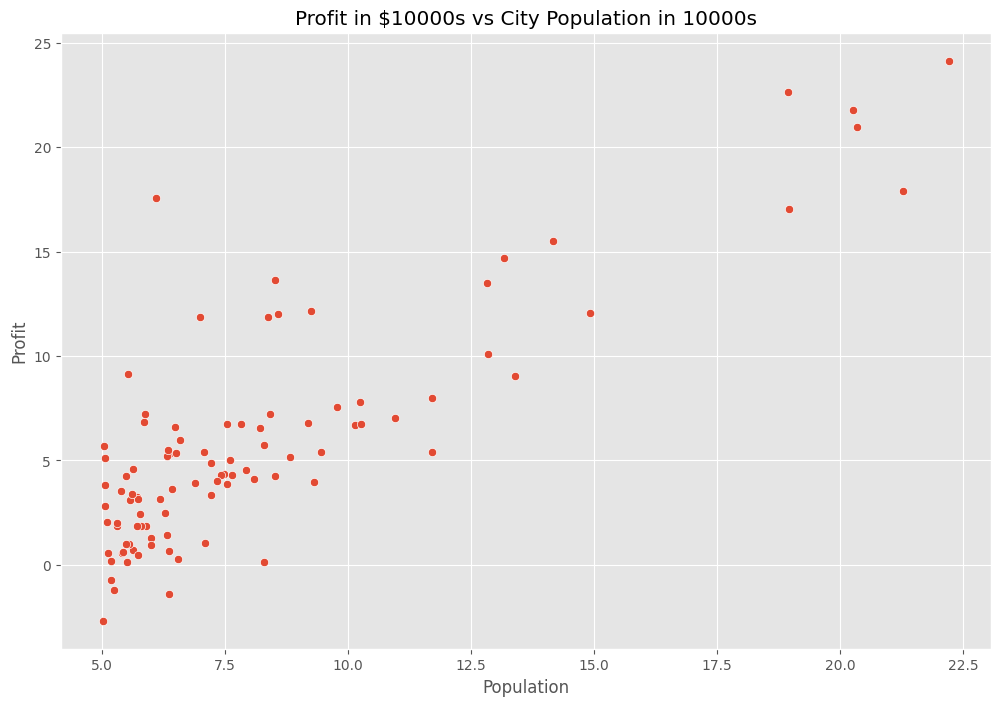

In [5]:
#visualize the data

ax = sns.scatterplot(x='Population', y='Profit', data=data)
ax.set_title('Profit in $10000s vs City Population in 10000s')


In [9]:
#compute the cost function

def cost_function(X, y, theta):
    m = len(y)
    y_pred = X.dot(theta)
    error = (y_pred - y) ** 2
    
    return 1/(2*m) * np.sum(error)



In [10]:

m = data.Population.values.size
X = np.append(np.ones((m, 1)), data.Population.values.reshape(m, 1), axis=1)
y = data.Profit.values.reshape(m, 1)
theta = np.zeros((2, 1))

cost_function(X, y, theta)

32.072733877455676

In [11]:
#gradient descent

def gradient_descent(X, y, theta, alpha, iterations):
    m = len(y)
    costs = []
    for i in range(iterations):
        y_pred = X.dot(theta)
        error = np.dot(X.transpose(), (y_pred - y))
        theta -= alpha * 1/m * error
        costs.append(cost_function(X, y, theta))
        
    return theta, costs



In [13]:

theta, costs = gradient_descent(X, y, theta, alpha=0.01, iterations=2000)

print("h(x) = {} + {}x1".format(str(round(theta[0, 0], 2)),
                        str(round(theta[1, 0], 2))))


h(x) = -3.89 + 1.19x1


In [15]:
from mpl_toolkits.mplot3d import Axes3D

In [16]:
theta_0 = np.linspace(-10, 10, 100)
theta_1 = np.linspace(-1, 4, 100)

cost_values = np.zeros((len(theta_0), len(theta_1)))

for i in range(len(theta_0)):
    for j in range(len(theta_1)):
        t = np.array([theta_0[i], theta_1[j]])
        cost_values[i, j] = cost_function(X, y, t)

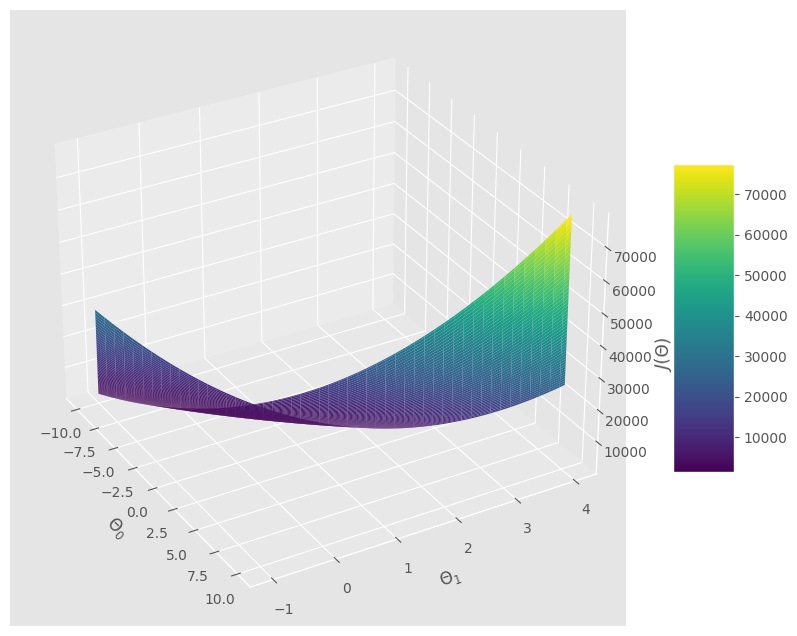

In [20]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(projection='3d')

surf = ax.plot_surface(theta_0, theta_1, cost_values, cmap='viridis')
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.xlabel('$\Theta_0$')
plt.ylabel('$\Theta_1$')
ax.set_zlabel('$J(\Theta)$')
ax.view_init(30, 330)

plt.show()

Text(0.5, 1.0, 'Values of the Cost Function over Iterations of Gradient Descent')

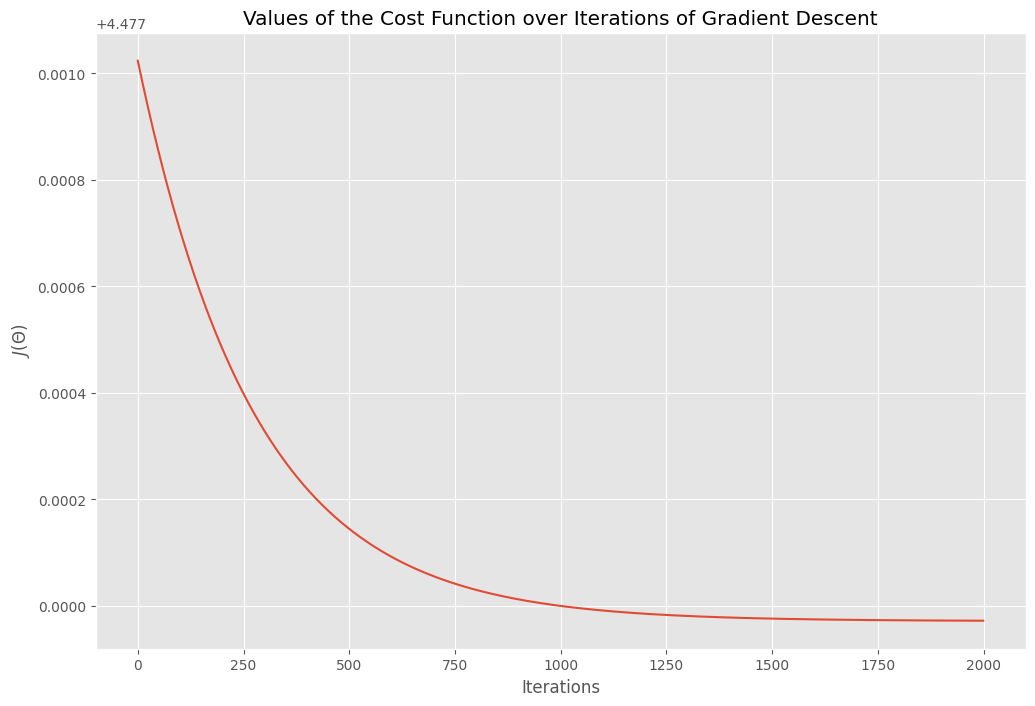

In [22]:
#plot the convergence

plt.plot(costs)
plt.xlabel('Iterations')
plt.ylabel('$J(\Theta)$')
plt.title('Values of the Cost Function over Iterations of Gradient Descent')

In [24]:
#training data with linear regression fit

theta.shape


(2, 1)

In [25]:
theta

array([[-3.89286253],
       [ 1.19274046]])

TypeError: lineplot() takes from 0 to 1 positional arguments but 2 were given

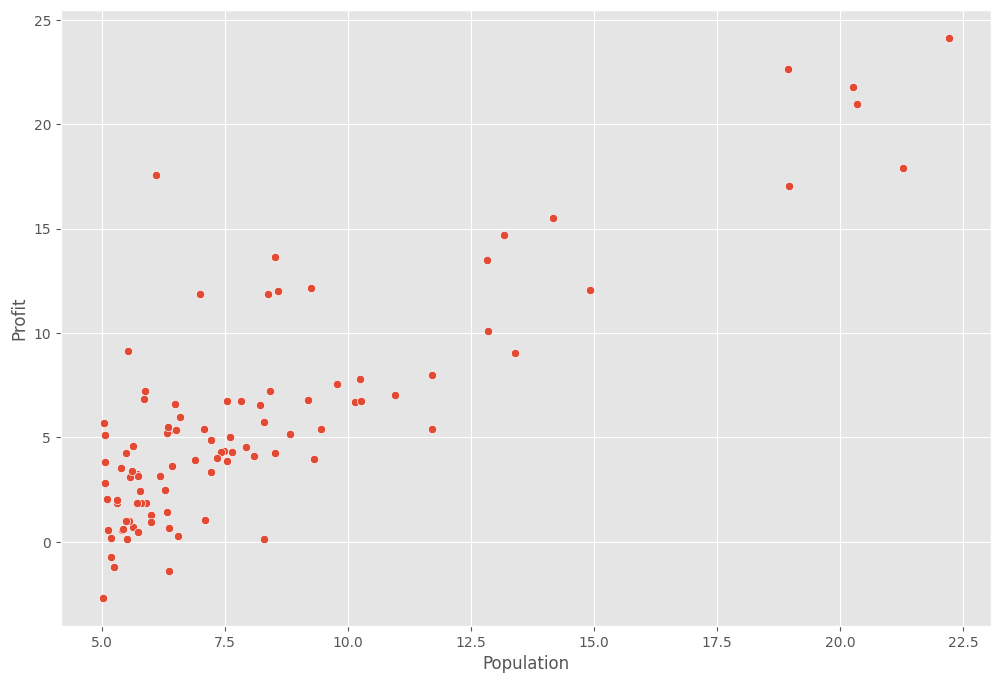

In [27]:
theta = np.squeeze(theta)
sns.scatterplot(x='Population', y='Profit', data=data)

x_value = [x for x in range(5, 25)]
y_value = [(x * theta[1] + theta[0]) for x in x_value]
sns.lineplot(x_value, y_value)

plt.xlabel('Population in 10000s')
plt.ylabel('Profit in $10,000s')
plt.title('Linear Regression Fit')

In [29]:
#inference using the optimized theta values

def predict(x, theta):
    y_pred = np.dot(theta.transpose(), x)
    return y_pred


y_pred_1 = predict(np.array([1, 4]), theta) * 10000
print("For a population of 40,000 people, the model predicts a profit of $" + str(round(y_pred_1, 0)))



For a population of 40,000 people, the model predicts a profit of $8781.0
